#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/3_content_bold_color_img/kpca_512_3.csv')
data

,id,KernelPCA_1,KernelPCA_2,KernelPCA_3,KernelPCA_4,KernelPCA_5,KernelPCA_6,KernelPCA_7,KernelPCA_8,KernelPCA_9,...,KernelPCA_504,KernelPCA_505,KernelPCA_506,KernelPCA_507,KernelPCA_508,KernelPCA_509,KernelPCA_510,KernelPCA_511,KernelPCA_512,success_x
0,NMN2,-0.301404,-0.054841,0.038186,0.008313,-0.043541,-0.035233,0.013869,-0.028061,-0.003594,...,0.000100,-0.000256,-0.000205,0.000067,0.000288,-0.000152,-0.000238,-0.000027,0.000153,1
1,ZENLET-The-Dual,-0.301404,-0.054841,0.038186,0.008313,-0.043541,-0.035233,0.013869,-0.028061,-0.003594,...,0.000100,-0.000256,-0.000205,0.000067,0.000288,-0.000152,-0.000238,-0.000027,0.000153,1
2,hhl-penzhai,0.079913,-0.039459,-0.013238,-0.063887,-0.040166,-0.047596,-0.006810,0.014466,0.014082,...,-0.032585,0.000536,0.012506,0.003504,-0.014301,0.008805,-0.000677,0.001538,-0.001094,1
3,scion-36,-0.301404,-0.054841,0.038186,0.008313,-0.043541,-0.035233,0.013869,-0.028061,-0.003594,...,0.000100,-0.000256,-0.000205,0.000067,0.000288,-0.000152,-0.000238,-0.000027,0.000153,1
4,amt-cube,0.435237,-0.046589,-0.007563,0.025831,-0.044868,-0.073984,-0.036290,-0.023720,0.025578,...,0.012707,0.010361,-0.013269,-0.012366,0.011406,0.012904,0.001233,-0.021390,-0.017606,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,wlm-tw,-0.227652,0.100662,-0.163338,-0.026010,0.043428,0.057348,-0.059634,-0.005686,-0.039887,...,-0.030505,0.030731,-0.011186,0.000855,0.014589,0.029687,0.008263,-0.040619,-0.023789,0
5608,8bowchou,-0.301404,-0.054841,0.038186,0.008313,-0.043541,-0.035233,0.013869,-0.028061,-0.003594,...,0.000100,-0.000256,-0.000205,0.000067,0.000288,-0.000152,-0.000238,-0.000027,0.000153,0
5609,bananalin,-0.301404,-0.054841,0.038186,0.008313,-0.043541,-0.035233,0.013869,-0.028061,-0.003594,...,0.000100,-0.000256,-0.000205,0.000067,0.000288,-0.000152,-0.000238,-0.000027,0.000153,0
5610,fooddesignlab,-0.301404,-0.054841,0.038186,0.008313,-0.043541,-0.035233,0.013869,-0.028061,-0.003594,...,0.000100,-0.000256,-0.000205,0.000067,0.000288,-0.000152,-0.000238,-0.000027,0.000153,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4286
0    1326
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.6
Recall: 0.58
Precision: 0.84
F1-Score: 0.68
F0.5-Score: 0.77
F0.3-Score: 0.81


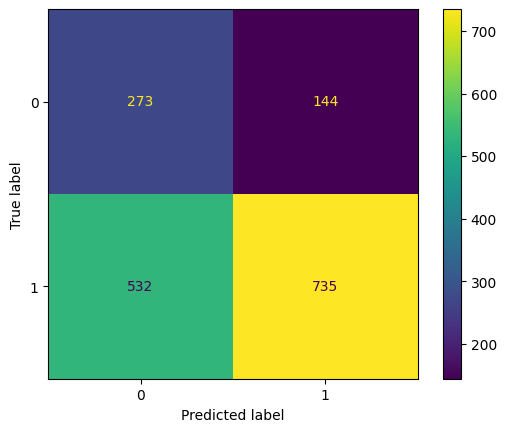

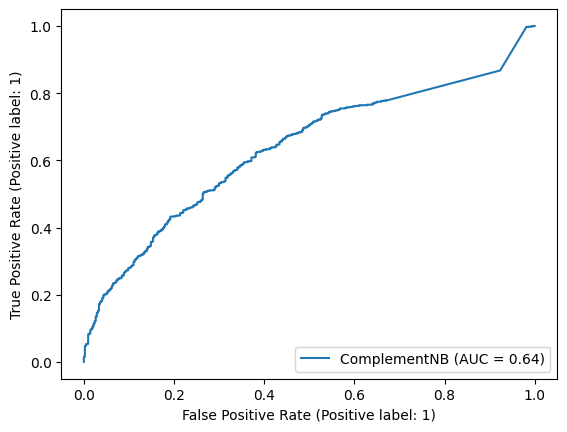

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


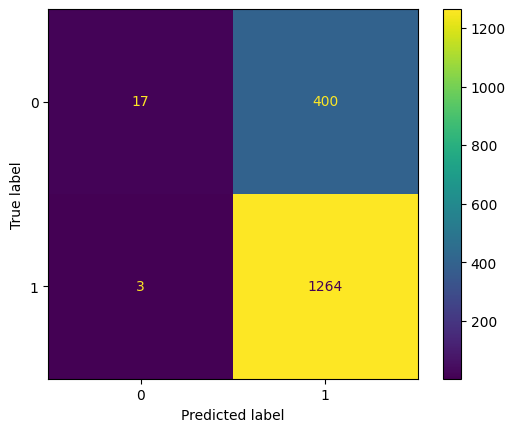

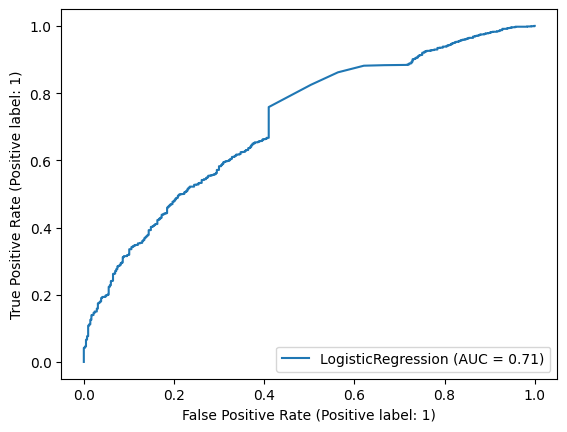

---- Under Sample Data ----
Accuracy: 0.59
Recall: 0.55
Precision: 0.86
F1-Score: 0.67
F0.5-Score: 0.77
F0.3-Score: 0.82


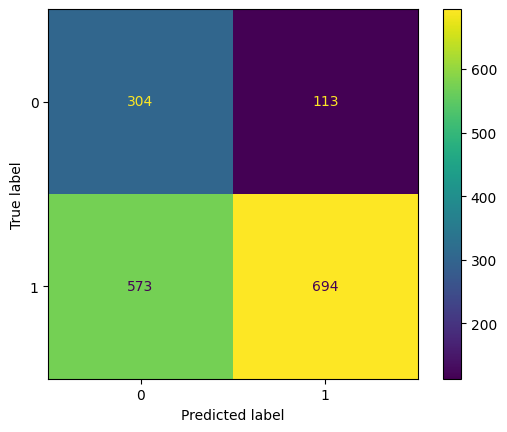

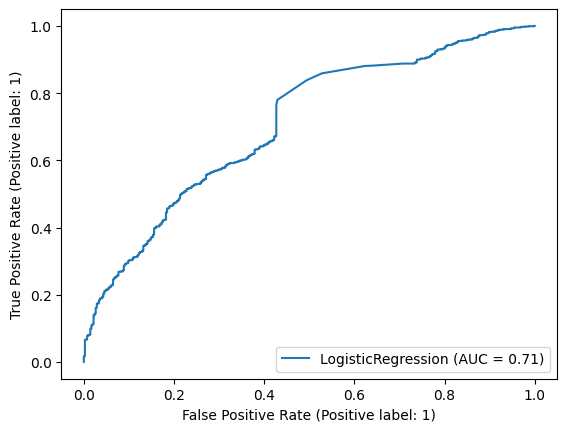

---- Over Sample Data ----
Accuracy: 0.62
Recall: 0.6
Precision: 0.85
F1-Score: 0.7
F0.5-Score: 0.78
F0.3-Score: 0.82


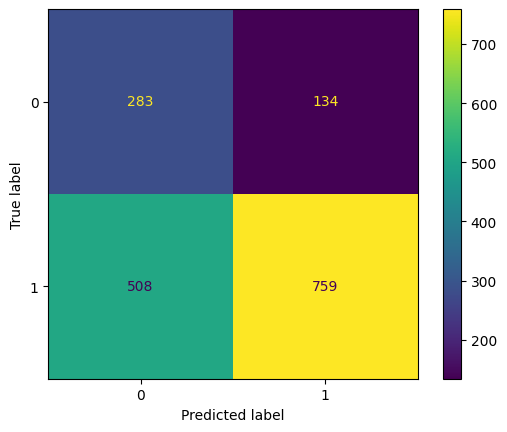

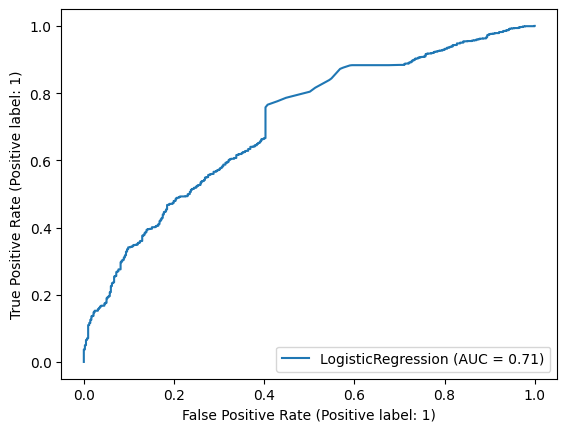

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


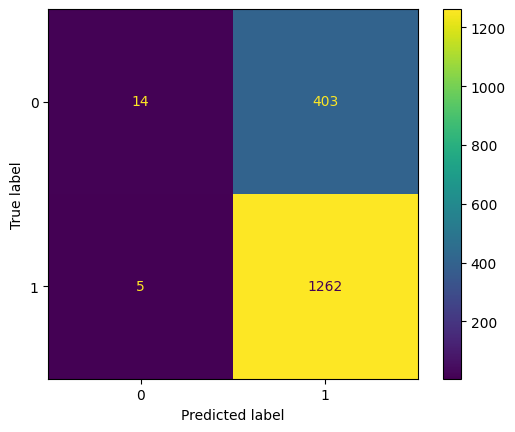

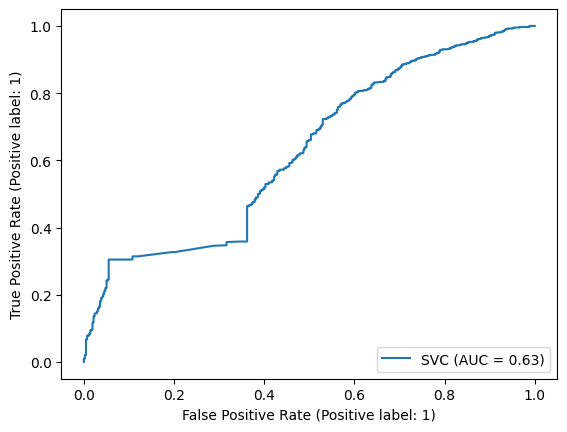

---- Under Sample Data ----
Accuracy: 0.59
Recall: 0.53
Precision: 0.87
F1-Score: 0.66
F0.5-Score: 0.77
F0.3-Score: 0.83


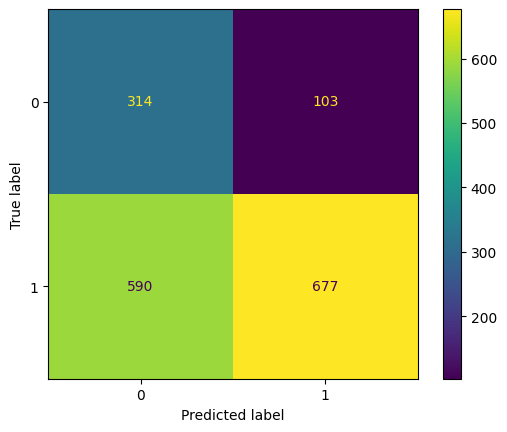

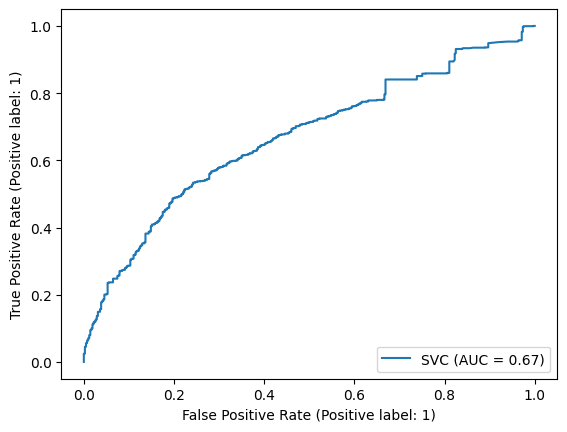

---- Over Sample Data ----
Accuracy: 0.66
Recall: 0.72
Precision: 0.81
F1-Score: 0.76
F0.5-Score: 0.79
F0.3-Score: 0.81


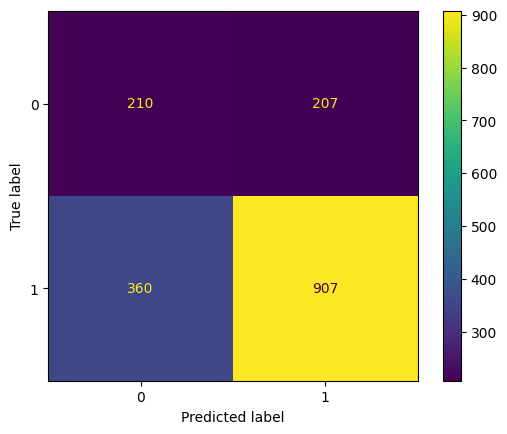

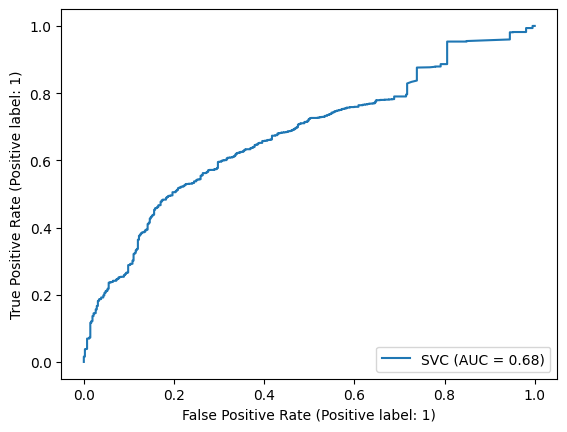

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 1.0
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


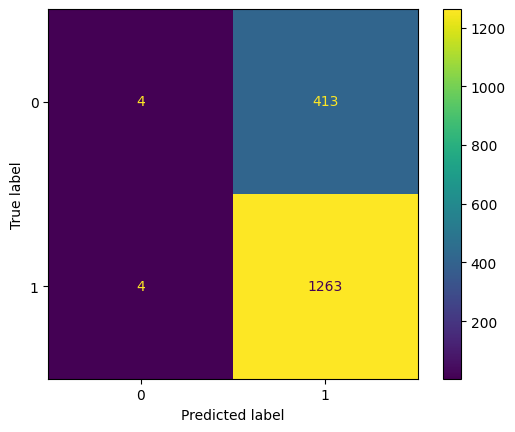

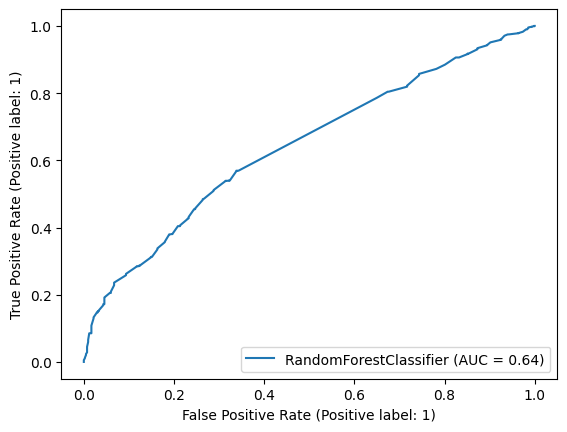

---- Under Sample Data ----
Accuracy: 0.52
Recall: 0.46
Precision: 0.83
F1-Score: 0.59
F0.5-Score: 0.71
F0.3-Score: 0.78


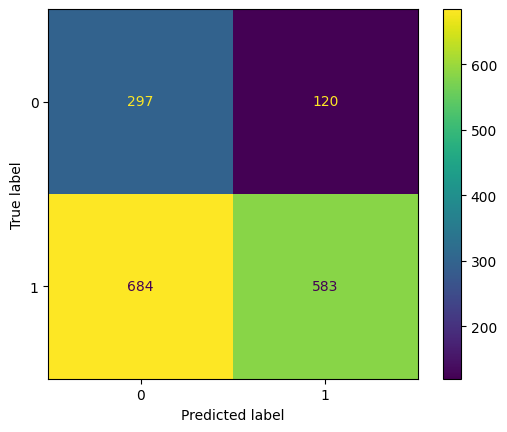

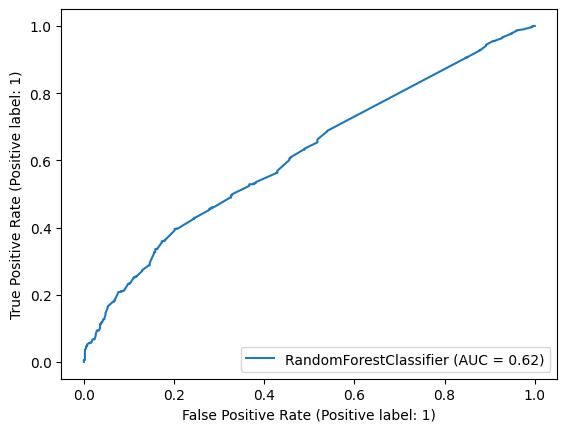

---- Over Sample Data ----
Accuracy: 0.66
Recall: 0.78
Precision: 0.78
F1-Score: 0.78
F0.5-Score: 0.78
F0.3-Score: 0.78


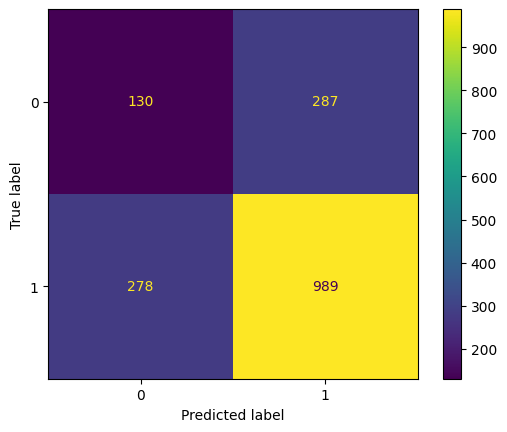

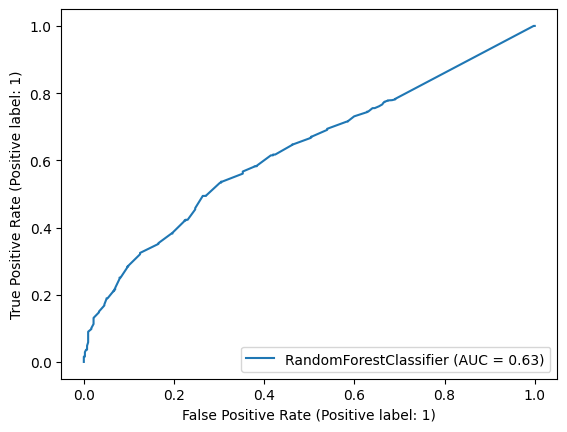

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


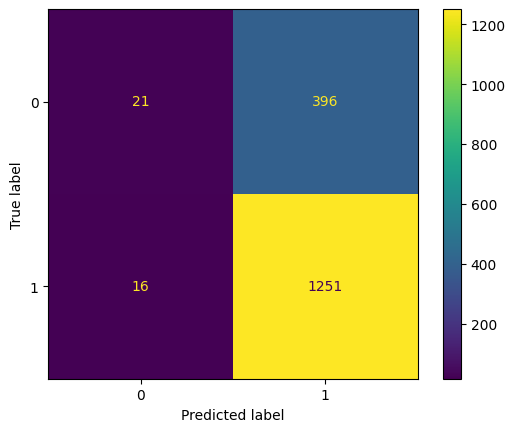

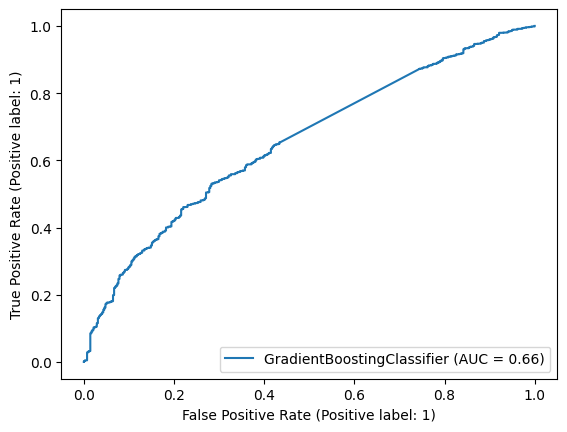

---- Under Sample Data ----
Accuracy: 0.56
Recall: 0.51
Precision: 0.84
F1-Score: 0.64
F0.5-Score: 0.75
F0.3-Score: 0.8


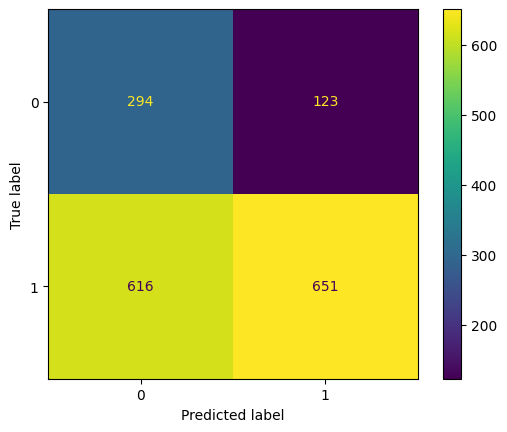

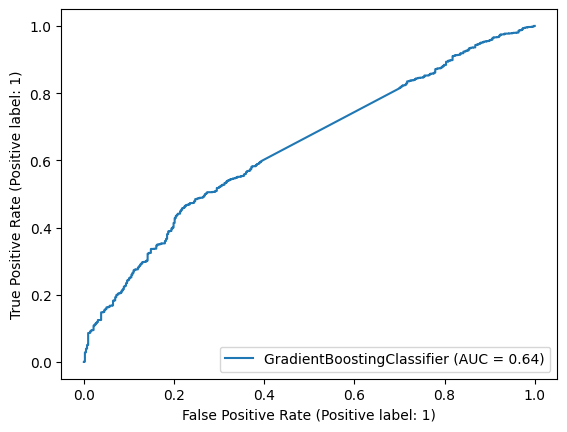

---- Over Sample Data ----
Accuracy: 0.64
Recall: 0.67
Precision: 0.82
F1-Score: 0.74
F0.5-Score: 0.79
F0.3-Score: 0.81


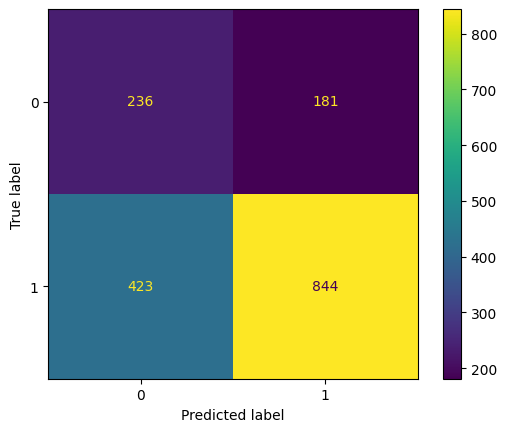

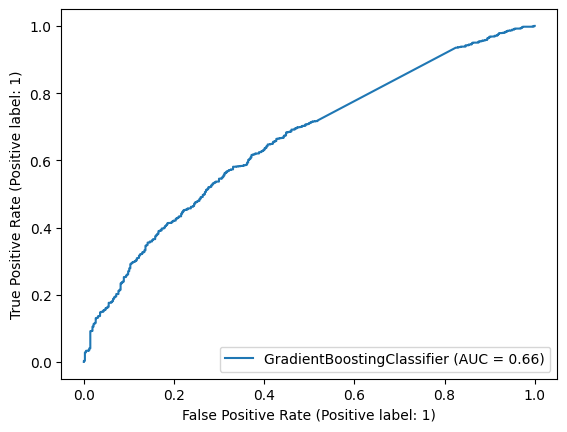

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
